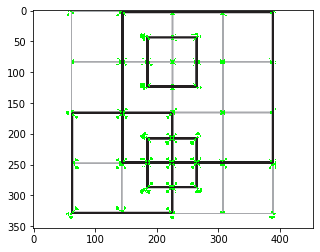

In [9]:
%config IPCompleter.greedy=True # for intellisense or auto complition
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import numpy as np

imggray = imread('1pyfiles/box.jpg','gray') # The root directory / or using #imggray=rgb2gray(img)
plt.imshow(imggray)

#-----------------------------
#Sobel operator kernels
#----------------------------
from scipy import signal as sig
import numpy as np
def gradient_x(imggray):
    kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    return sig.convolve2d(imggray, kernel_x, mode='same')
def gradient_y(imggray):
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return sig.convolve2d(imggray, kernel_y, mode='same')
I_x = gradient_x(imggray)
I_y = gradient_y(imggray)
#print(I_x)
Ixx = I_x**2
Ixy = I_y*I_x
Iyy = I_y**2

#---------------------------------------
#Harris corners
#----------------------------------------
from numpy import linalg as LA
from PIL import Image
offset=1
k=0.04
im = Image.open('1pyfiles/box.jpg')
imgcopy = np.array(im)  # Converting image to array
#import shutil  #using for copy of an image 
#shutil.copy("1pyfiles/box.jpg","1pyfiles/box2.jpg")
width, height=im.size
r = np.zeros((width-1, height-1))
 # or maybe this command height, width = np.array(im).shape
for y in range(offset, height-offset):
    for x in range(offset, width-offset):
        Sxx = np.sum(Ixx[y-offset:y+1+offset, x-offset:x+1+offset])
        Syy = np.sum(Iyy[y-offset:y+1+offset, x-offset:x+1+offset])
        Sxy = np.sum(Ixy[y-offset:y+1+offset, x-offset:x+1+offset])
        r1=np.array([[Sxx,Sxy],[Sxy,Syy]]) # Constructing the Matrix M
        w, v = LA.eig(r1) #Obtaining the eigenvalues
        det=w[0]*w[1]
        trace=w[0]+w[1]
        r[x,y] = det - k*(trace**2)
        if r[x,y]>0:
            imgcopy[y,x]=[0,255,0]
plt.imshow(imgcopy)